In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib as plt
import tqdm
import datetime
import json
import collections
%matplotlib inline

#1.	Выгрузить описания открытых вакансий с любой из площадок (hh.ru, rabota.sber.ru, indeed.com)

In [2]:
sber = '3529'
page = 1
num_per_page = 100
Samara = 1

In [3]:
url = f'http://api.hh.ru/vacancies?employer_id={sber}&page={page}&per_page={num_per_page}&area={Samara}'
res = requests.get(url)
vacancies = res.json()
num_pages = vacancies.get('pages')

In [5]:
all_vacancy_ids = []
for i in tqdm.tqdm(range(num_pages)):
    url = f'http://api.hh.ru/vacancies?employer_id={sber}&page={i}&per_page={num_per_page}&area={Samara}'
    res = requests.get(url)
    vacancies = res.json()
    vacancy_ids = [el.get('id') for el in vacancies.get('items')]
    all_vacancy_ids.extend(vacancy_ids)
all_vacancy_ids

100%|██████████| 20/20 [00:19<00:00,  1.04it/s]


['51731713',
 '51711228',
 '51780153',
 '51805525',
 '51276841',
 '51808940',
 '46380141',
 '51648092',
 '50453967',
 '51027412',
 '51897305',
 '51214470',
 '51431993',
 '49294198',
 '51345153',
 '51804304',
 '51626043',
 '50490943',
 '50172507',
 '51320594',
 '51281296',
 '50712438',
 '51285630',
 '47409515',
 '51797968',
 '49910234',
 '48123524',
 '51342385',
 '51799540',
 '51589229',
 '50731679',
 '46943947',
 '51001496',
 '44279989',
 '51656253',
 '50928878',
 '50586554',
 '51287726',
 '50707523',
 '51181110',
 '51700194',
 '51431896',
 '51589255',
 '50296217',
 '51694775',
 '50930733',
 '51886799',
 '50879518',
 '51804193',
 '51841756',
 '51882348',
 '50710091',
 '51631958',
 '51207432',
 '51364755',
 '50857146',
 '51480341',
 '51270774',
 '51206583',
 '51250498',
 '49762983',
 '51212135',
 '51037254',
 '51263855',
 '51362903',
 '49938214',
 '50334733',
 '51037676',
 '50922335',
 '51738015',
 '51776544',
 '49878409',
 '50859520',
 '51087539',
 '50440683',
 '51089810',
 '49981757',

In [6]:
today = datetime.datetime.now()
previous_month = today.replace(day=1) - datetime.timedelta(days=1)

all_vacancy_ids = []
interval = 14
for i in tqdm.tqdm(range(num_pages)):
    start_date = previous_month
    interval_end = start_date + datetime.timedelta(days=interval)
    end_date = today

    while start_date <= end_date:
        url = f'http://api.hh.ru/vacancies?employer_id={sber}&page={i}&per_page={num_per_page}&area={Samara}&date_from={start_date.isoformat()}&date_to={interval_end.isoformat()}'
        res = requests.get(url)
        vacancies = res.json()

        vacancy_ids = [el.get('id') for el in vacancies.get('items')]
        all_vacancy_ids.extend(vacancy_ids)

        start_date = interval_end
        interval_end = start_date + datetime.timedelta(days=interval)

100%|██████████| 20/20 [00:31<00:00,  1.58s/it]


In [7]:
len(all_vacancy_ids)

1681

In [8]:
import pickle

with open('vacancies.pickle', 'rb') as f:
    all_vacancies_dict = pickle.load(f)

In [10]:
#Вытаскиваем все вакансии с hh.ru c запросом полной информации о вакансии по ее id
all_vacancies = []
for vacid in tqdm.tqdm(all_vacancy_ids):
    url = f"https://api.hh.ru/vacancies/{vacid}"
    res = requests.get(url)
    vacancy = res.json()
    all_vacancies.append(vacancy)

100%|██████████| 1540/1540 [03:59<00:00,  6.42it/s]


In [12]:
#Вытаскиваем все полные описания вакансий
all_vacancy_descriptions = [vac.get("description") for vac in all_vacancies_dict.values()]
all_vacancy_descriptions[0]

'<p>Хочешь работать в банке, но офисная рутина не для тебя?</p> <p>Мы как раз ищем менеджера, который будет продвигать продукты и сервисы экосистемы Сбера на внешних потоках клиентов.</p> <p>Тебе точно у нас понравится, если ты:</p> <ul> <li>хочешь развивать навык продаж</li> <li>готов стать экспертом в продуктах и сервисах Сбера</li> <li>легко находишь общий язык с людьми и умеешь быстро устанавливать контакт</li> </ul> <p>Нам важно, чтобы ты с радостью вставал в будни по утрам, поэтому мы предлагаем:</p> <ul> <li>шестидневное оплачиваемое обучение перед трудоустройством .</li> <li>официальное трудоустройство с первого дня.</li> <li>гибкий график работы.</li> <li>активную работу на точках продаж на территории наших партнёров (ТЦ, кофейни, торговые площадки).</li> <li>ипотеку выгоднее на 4% для каждого сотрудника</li> <li>льготные условия кредитования</li> <li>мобильную связь, корпоративный ipad и затраты на транспорт за счет компании</li> <li>теплую базу клиентов</li> <li>ДМС с первог

In [13]:
#Вытаскиваем все полные описания вакансий
all_vacancy_descriptions = [vac.get("description") for vac in all_vacancies]
all_vacancy_descriptions

['<p>Хочешь работать в банке, но офисная рутина не для тебя?</p> <p>Мы как раз ищем менеджера, который будет продвигать продукты и сервисы экосистемы Сбера на внешних потоках клиентов.</p> <p>Тебе точно у нас понравится, если ты:</p> <ul> <li>хочешь развивать навык продаж</li> <li>готов стать экспертом в продуктах и сервисах Сбера</li> <li>легко находишь общий язык с людьми и умеешь быстро устанавливать контакт</li> </ul> <p>Нам важно, чтобы ты с радостью вставал в будни по утрам, поэтому мы предлагаем:</p> <ul> <li>шестидневное оплачиваемое обучение перед трудоустройством .</li> <li>официальное трудоустройство с первого дня.</li> <li>гибкий график работы.</li> <li>активную работу на точках продаж на территории наших партнёров (ТЦ, кофейни, торговые площадки).</li> <li>ипотеку выгоднее на 4% для каждого сотрудника</li> <li>льготные условия кредитования</li> <li>мобильную связь, корпоративный ipad и затраты на транспорт за счет компании</li> <li>теплую базу клиентов</li> <li>ДМС с перво

#2.	Предообработать текст описаний вакансий (токенизировать, нормировать)

In [16]:
!pip install pymorphy2

In [13]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

In [15]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/agafurov/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [31]:
from nltk.corpus import stopwords
russian_stopwords = stopwords.words("russian")
russian_stopwords.extend(['о', 'по'])

In [17]:
vac_doc = all_vacancy_descriptions

In [18]:
import re

In [19]:
vac_doc_split = []
for line in vac_doc:
    vac_doc_split.append(' '.join(re.split('[^А-Яа-я]+', line.strip())))

In [21]:
len(vac_doc_split)

1580

In [ ]:
new_doc = ['хотеть', работать'б 

In [38]:
mainland = []
for doc in vac_doc_split:
    new_doc = []
    for word in doc.split():
        if word.lower() not in russian_stopwords:
             new_doc.append(morph.parse(word)[0].normal_form)
    mainland.append(' '.join(new_doc))

In [39]:
mainland #ПОЧЕМУ МНОГО РАЗ ПОВТОРЯЕТСЯ??????

['хотеть работать банк офисный рутина искать менеджер который продвигать продукт сервис экосистема сбер внешний поток клиент ты точно понравиться хотеть развивать навык продажа готовый стать эксперт продукт сервис сбер легко находить общий язык человек уметь быстро устанавливать контакт мы важно радость вставать будни утро поэтому предлагать шестидневный оплачивать обучение трудоустройство официальный трудоустройство первый день гибкий график работа активный работа точка продажа территория наш партн ров тц кофейня торговый площадка ипотека выгодный каждый сотрудник льготный условие кредитование мобильный связь корпоративный затрата транспорт счёт компания тёплый база клиент дмс первый день льготный страхование близкий бесплатный подписка сберпрайм скидка продукт компания партнёр сбер маркет самокат ситимобила сбер еаптека другой корпоративный пенсионный программа обучение счёт компания онлайн курс виртуальный школа сбер возможность получить новый квалификация курс будущий родитель мате

#3.	Взять любой текст, описывающий опыт из резюме, и аналогично предобработать

In [119]:
with open('/Users/Roman/Desktop/Python Alex Levchenko/Итоговый проект/Описание опыта из резюме.txt') as f:
    lines = f.readlines()

In [120]:
lines

['Организация работы коллегиального органа, технический секретарь Правления Банка: Замещающий секретарь Комитета по предоставлению кредитов и инвестиций; Комитета по розничному кредитованию. Осуществляет организационно-техническое обеспечение заседаний Правления.\n',
 'Проведение заседаний, формирование и согласование повестки, даты и времени проведения заседания с Председателем Комитета, Правления, приглашение членов и участников на заседание. Оформление постановлений, решений и протоколов заседаний, обеспечение сохранности документов до сдачи в архив. Регистрация и доведение принятых постановлений в СЭОДО до соответствующих подразделений Банка. Подготовка материалов о ходе выполнения поручений Правления. Справочно-информационная работа по ранее принятым решениям, Постановлениям Правления. Консультация внутренних клиентов по вопросам оформления, регистрации и подготовки документов к заседаниям с участием руководства Банка.\n',
 'Контрольно-аналитическая работа: формирование контрольны

In [121]:
vac_doc_rezume_split = []
for line in lines:
    vac_doc_rezume_split.append(' '.join(re.split('[^А-Яа-я]+', line.strip())))

In [122]:
print(vac_doc_rezume_split)

['Организация работы коллегиального органа технический секретарь Правления Банка Замещающий секретарь Комитета по предоставлению кредитов и инвестиций Комитета по розничному кредитованию Осуществляет организационно техническое обеспечение заседаний Правления ', 'Проведение заседаний формирование и согласование повестки даты и времени проведения заседания с Председателем Комитета Правления приглашение членов и участников на заседание Оформление постановлений решений и протоколов заседаний обеспечение сохранности документов до сдачи в архив Регистрация и доведение принятых постановлений в СЭОДО до соответствующих подразделений Банка Подготовка материалов о ходе выполнения поручений Правления Справочно информационная работа по ранее принятым решениям Постановлениям Правления Консультация внутренних клиентов по вопросам оформления регистрации и подготовки документов к заседаниям с участием руководства Банка ', 'Контрольно аналитическая работа формирование контрольных поручений в СЭОДО пост

In [43]:
vac_doc_rezume_split = ['Организация работы коллегиального органа технический секретарь Правления Банка Замещающий секретарь Комитета по предоставлению кредитов и инвестиций Комитета по розничному кредитованию Осуществляет организационно техническое обеспечение заседаний Правления Проведение заседаний формирование и согласование повестки даты и времени проведения заседания с Председателем Комитета Правления приглашение членов и участников на заседание Оформление постановлений решений и протоколов заседаний обеспечение сохранности документов до сдачи в архив Регистрация и доведение принятых постановлений в СЭОДО до соответствующих подразделений Банка Подготовка материалов о ходе выполнения поручений Правления Справочно информационная работа по ранее принятым решениям Постановлениям Правления Консультация внутренних клиентов по вопросам оформления регистрации и подготовки документов к заседаниям с участием руководства Банка Контрольно аналитическая работа формирование контрольных поручений в СЭОДО постановка поручений на контроль учет информации о ходе исполнения снятие с контроля Подготовка отчетов и статистики о ходе исполнения контролируемых поручений Консультация исполнителей по вопросам контроля исполнения поручений ']


In [44]:
island = []
for doc in vac_doc_rezume_split:
    new_doc_rezume = []
    for word in doc.split():
        if word.lower() not in russian_stopwords:
            new_doc_rezume.append(morph.parse(word)[0].normal_form)
    island.append(' '.join(new_doc_rezume))

In [45]:
island#ПОЧЕМУ ПОВТОРЯЕТСЯ НЕСКОЛЬКО РАЗ??????

['организация работа коллегиальный орган технический секретарь правление банк замещать секретарь комитет предоставление кредит инвестиция комитет розничный кредитование осуществлять организационно технический обеспечение заседание правление проведение заседание формирование согласование повестка дата время проведение заседание председатель комитет правление приглашение член участник заседание оформление постановление решение протокол заседание обеспечение сохранность документ сдача архив регистрация доведение принять постановление сэодый соответствующий подразделение банк подготовка материал ход выполнение поручение правление справочный информационный работа ранее принять решение постановление правление консультация внутренний клиент вопрос оформление регистрация подготовка документ заседание участие руководство банк контрольный аналитический работа формирование контрольный поручение сэодый постановка поручение контроль учёт информация ход исполнение снятие контроль подготовка отчёт ст

#4.	Посчитать векторное представление описаний вакансий и опыта из резюме

In [46]:
processed_docs = mainland
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
bow_rep_tfidf = tfidf.fit_transform(processed_docs)

In [47]:
bow_rep_tfidf

<1580x6976 sparse matrix of type '<class 'numpy.float64'>'
	with 205223 stored elements in Compressed Sparse Row format>

In [49]:
temp = tfidf.transform(island)

In [51]:
from sklearn.metrics.pairwise import cosine_similarity

In [59]:
cosine_sim =  cosine_similarity(bow_rep_tfidf, temp).ravel()

In [71]:
top_10 = cosine_sim.argsort()[-10:]

In [ ]:
print((top_10))

In [72]:
top_10

array([1416,  473,  104,   98, 1117,  111,  880, 1239, 1329,    6])

In [74]:
for index in top_10:
    print(index)
    print(vac_doc_split[index])
    print('\n')

1416
 Динамический баланс это большая финансовая модель деятельности банка позволяющая прогнозировать основные финансовые показатели Банка баланс процентный доход компоненты отчета о прибылях и убытках в разрезе центров прибыли бизнес блоков и клиентских сегментов показатели основных видов риска банковской книги процентный и валютные риски банковской книги риск ликвидности достаточность регуляторного капитала и экономический капитал по рискам а также нормативы Банка России по этим видам риска Основные цели проекта Регулярное предоставление Руководству Банка прогнозов баланса процентного дохода маржи по Банку и отдельным Бизнес Блокам нормативов и риск метрик для принятия управленческих решений и стратегического планирования управления Банком Создание системы поддержки принятия решения на уровне Правления банка для управления структурой баланса профилем процентного и валютного рисков риска ликвидности и достаточности капитала Система уже используется в текущих процессах банка и непосред

In [126]:
print("Матрица_1",tfidf.idf_)
print("-"*10)
print("Матрица_2",tfidf.get_feature_names())
print("-"*10)
print("Матрица_3",bow_rep_tfidf.toarray())
temp = tfidf.transform([island])
print("Матрица_4 for island3:\n", temp.toarray())
#ЗДЕСЬ НЕТ АТРИБУТА lower, откуда он в ошибке????

Матрица_1 [8.73423878 8.84783596 7.37343433 ... 7.46908881 7.72202793 8.92600073]
----------
Матрица_2 ['аба', 'аббревиатура', 'абонемент', 'абонент', 'абс', 'абсолютно', 'абстракция', 'абсурдно', 'ава', 'авайрин', 'авангард', 'авар', 'аварийный', 'авария', 'аватар', 'авизование', 'авк', 'авпо', 'авто', 'автовалидация', 'автогенерация', 'автодеплоить', 'автозаполнение', 'автоконсультирование', 'автоконтроль', 'автоконфигурирование', 'автокредит', 'автокредитование', 'автолэйаут', 'автомат', 'автоматизатор', 'автоматизация', 'автоматизиация', 'автоматизированный', 'автоматизировать', 'автоматический', 'автомобиль', 'автомобильный', 'автомониторинг', 'автомотизация', 'автономно', 'автономность', 'автономный', 'автообработка', 'автооткат', 'автоплатёж', 'автопроверка', 'автор', 'авторазвый', 'авторегистрация', 'авторегресс', 'авторизационный', 'авторизация', 'авторизировать', 'авторитет', 'авторитетный', 'авторский', 'автотест', 'автотестер', 'автотестирование', 'агент', 'агентский', 'аге

AttributeError: 'list' object has no attribute 'lower'

#5.	Посчитать косинусную меру сходства для опыта и описаний вакансий

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_n = print(cosine_similarity(island, mainland))

#6.	Ранжировать вакансии по мере их сходства с опытом

In [ ]:
sorted_similar_vacancy = sorted(cosine_n, key=lambda x:x[1], reverse=True) #сортировка в порядке убывания

#7.	Вывести Топ-10 наиболее релевантных

In [ ]:
sorted_similar_vacancy_10 = sorted(cosine_n, key=lambda x:x[1], reverse=True[:10])

#8.	Подготовить скрипт принимающий на вход текстовое описание опыта и выводящий Топ-10 наиболее релевантных вакансий из 100 случайно выбранных из выгрузки

In [107]:
def tokenize_text(text):
    
    text = ' '.join(
        re.split('[^А-Яа-я]+', text.strip())
    )
    
    tokenized_text = []
    for word in text.split(' '):
        if word.lower() not in russian_stopwords:
            tokenized_text.append(morph.parse(word)[0].normal_form)
            
    return tokenized_text


def join_tokens(tokenized_texts):
    result = [' '.join(text) for text in tokenized_texts]
    return result
    
    

def vectorize_text(tokenized_texts):
    
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(join_tokens(tokenized_texts))
    
    return X, vectorizer
    
    


def pipeline(vacancies):
    
    tokenized_vacancies = []  
    for vacancy in vacancies:
        tokenized_vacancies.append(tokenize_text(vacancy))
        
    return vectorize_text(tokenized_vacancies)
        

In [109]:
def get_top10_out_of_100(text, vacancies, vectorizer, X):
    
    # Токенизация (в т.ч. нормализация, морфемизация) текста с опытом
    tokenized_text = tokenize_text(text)    
    
    # Векторизация текста с опытом
    text_vectorized = vectorizer.transform([' '.join(tokenized_text)])
    
    
    # Расссет косинусного сходства и выбор 100 случайных текстов
    cosine_total = cosine_similarity(X, text_vectorized).ravel()
    
    chosen_100_indecies = np.random.randint(0, X.shape[0]+1, size=100)
    
    cosine_chosen_100 = cosine_total[chosen_100_indecies]
    
    
    # Из выбранных 100 текстов выбираем топ 10 (10 наиболее схожих по косинусной метрике)
    top_10_indecies = cosine_chosen_100.argsort()[-10:]
    

    result = [vacancies[index] for index in top_10_indecies]
    
    # Функция распечатает топ10 вакансий
    
    print(*result, sep='\n\n')
    
    return result
    
    

In [108]:
X, vectorizer = pipeline(vac_doc_split)

In [110]:
result = get_top10_out_of_100(
    text=vac_doc_rezume_split[0],
    vacancies=vac_doc_split,
    vectorizer=vectorizer,
    X=X
)

 Наша команда занимается развитием всего Сбера Мы разрабатываем практические руководства формируем типовые процессы внедряем лучшие практики в производственный процесс Сбера Наши клиенты это производственные команды банка У нас много и нестандартных кейсов Мы не пишем пайплайны для банка мы помогаем командам делать это правильно Нам нужен талантливый инженер автоматизации который будет вместе с нами ускорять Сбер и делать его лучше Нужно уметь делать задачи под ключ самому принимать решение о конкретной технической реализации и уметь обосновать свой выбор помогать другим инженерам в команде Ты нам подходишь если Имеешь опыт работы в развитии в больших компаниях Знаешь лучшие практики и изучаешь новые процессов знаешь в чем их отличия и сможешь построить пайплайн от до Умеешь обрабатывать разные структуры данных пересылаемые между системами Знаешь чем микросервисы лучше монолита почему тестирование должно быть автоматическим и умеешь донести это другим Обязанности Построение и стандарти

In [114]:
import pandas as pd

In [115]:
df = pd.DataFrame(
    data=X.A,
    columns=vectorizer.get_feature_names(),
    index=all_vacancies_dict.keys()
)


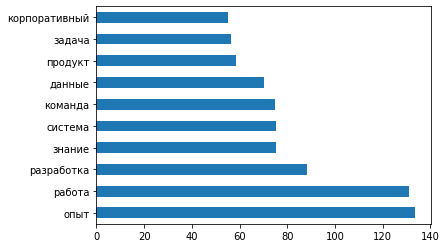

In [124]:
df.sum().sort_values(ascending=False)[:10].plot(kind='barh');